<a href="https://colab.research.google.com/github/astridcheylus/Business-Intelligence-and-Analytics/blob/master/Astrid_Cheylus_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/Assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import statistics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

warnings.filterwarnings('ignore')
%matplotlib inline

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics Personal Assignment</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

# IMPORTANT

Question 1: Before starting this assignment, please indicate whether this course is worth 4.5 or 6 credits to you. Please answer truthfully, as checks will be made afterwards. This question is only intended to facilitate the calculation of final points.

> TODO: 4.5

# Part 1: Climate Analytics - Rice vs Wheat in a Changing World

## Context

You work as a junior data analyst at SerriFleur, an international NGO focused on sustainable agriculture in the face of climate change. Your team is investigating how climate conditions and farming practices affect the yields of rice and wheat — two of the most critical staple crops globally.

You’ve just received a massive dataset from the research division: "Hydroponix.csv". Your task is to extract insights, build models, and tell a compelling story from the data. You can find the dataset here: https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/Hydroponix.csv

Columns Overview:

* `Year` : Year of the observation.

* `Country` : Country where the data was collected.

* `Region` : Specific region within the country.

* `Crop_Type` : Type of agricultural crop observed.

* `Average_Temperature` : Annual average temperature in degrees Celsius.

* `Total_Precipitation` : Total annual precipitation in millimeters.

* `CO2_Emissions` : CO₂ emissions in million tons.

* `Crop_Yield` : Agricultural yield in tons per hectare.

* `Extreme_Weather_Events` : Number of recorded extreme weather events.

* `Irrigation_Access` : Percentage of cultivated land with access to irrigation.

* `Pesticide_Use` : Pesticide use in kilograms per hectare.

* `Fertilizer_Use` : Fertilizer use in kilograms per hectare.

* `Soil_Health_Index` : Soil quality index (out of 100).

* `Economic_Impact` : Economic impact in million USD.

In [89]:
import pandas as pd

data_climate = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/Hydroponix.csv")


## Exercise 1: Data Cleaning & Preprocessing



The dataset you’ve received contains data from multiple countries, various crops, and inconsistent formatting. Your first job is to narrow the scope of your study and prepare a clean dataset that’s ready for analysis.

Your mission:

*   Filter the dataset to focus only on rice and wheat
*   Drop the regional identifiers column
*   Group the data by Country, Year and Crop_type but don't put them as index (*Hint: specific parameter of `groupby`*) and calculate the mean of each column
*   Change the type of the columns `Country` and `Crop_type`


In [47]:
# Question 2: Find the list of crop types produced by SerriFleur

data_climate['Crop_Type'].unique()

array(['Corn', 'Wheat', 'Coffee', 'Sugarcane', 'Fruits', 'Rice', 'Barley',
       'Vegetables', 'Soybeans', 'Cotton'], dtype=object)

In [48]:
# Data cleaning

# Filtrer pour ne garder que le riz et le blé
data_climate = data_climate[data_climate['Crop_Type'].isin(['Rice', 'Wheat'])]

# Supprimer la colonne Region
data_climate = data_climate.drop(columns='Region')

# Regrouper par Country, Year et Crop_Type et calculer la moyenne
data_climate = data_climate.groupby(['Country', 'Year', 'Crop_Type'], as_index=False).mean()

# Convertir Country et Crop_Type en type catégorie
data_climate['Country'] = data_climate['Country'].astype('category')
data_climate['Crop_Type'] = data_climate['Crop_Type'].astype('category')


In [49]:
# Question 3: Find the total number of countries where Serrifleur operates in
data_climate['Country'].nunique()


10

**Note on Climate Variables per Crop**:

> You may notice that climate-related variables such as average temperature and total precipitation vary across different crops, even for the same country and year. This is because each crop is typically grown in different regions within a country, depending on factors like soil conditions, irrigation availability, and climatic suitability. For example, wheat might be cultivated in cooler northern regions while corn is grown in warmer southern areas. Therefore, the recorded climate data reflects regional conditions specific to where each crop is grown, rather than national averages. This is an important consideration when interpreting the results of this analysis.

## Exercise 2: Exploratory Data Analysis

Before diving into modeling, your supervisor wants a clear picture of the current state of affairs in South America. You’re tasked with visualizing total precipitation level, economic impacts and soil health.

Your mission:


*   Plot total precipitation evolution over the years for each crop in Argentina
*   Create a pie chart that shows the percentage share of the total economic impact for each crop in Brazil
*   Create boxplots comparing soil health across crops and all the countries


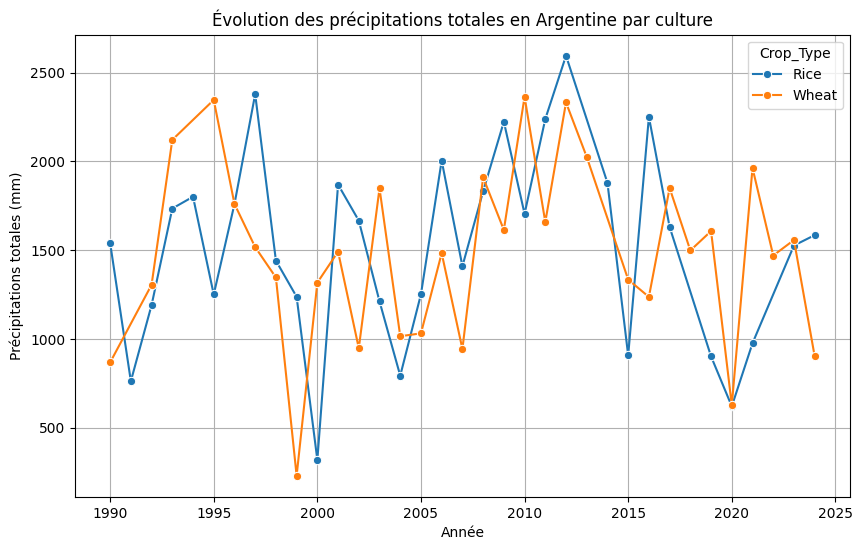

In [50]:
# Question 4: Create the graph of the total precipitation evolution over the years for each crop in Argentina

import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour l'Argentine
argentina_data = data_climate[data_climate['Country'] == 'Argentina']

# Tracer l'évolution des précipitations par culture
plt.figure(figsize=(10, 6))
sns.lineplot(data=argentina_data, x='Year', y='Total_Precipitation', hue='Crop_Type', marker='o')
plt.title('Évolution des précipitations totales en Argentine par culture')
plt.xlabel('Année')
plt.ylabel('Précipitations totales (mm)')
plt.grid(True)
plt.show()

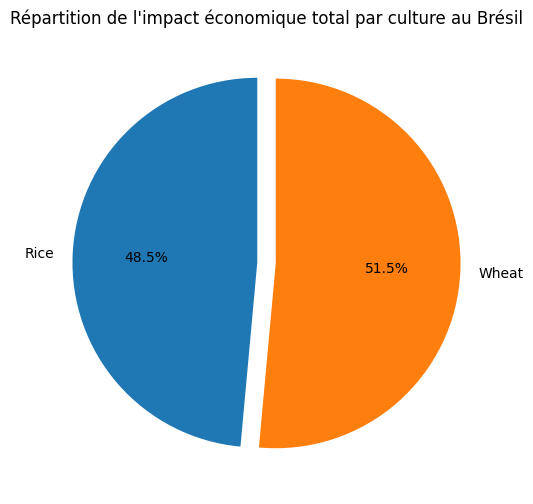

In [54]:
# Question 5: Create the pie chart that shows the percentage share of the totale economic impact for each crop in Brazil

brazil_data = data_climate[data_climate['Country'] == 'Brazil']
economic_impact = brazil_data.groupby('Crop_Type')['Economic_Impact'].sum()

plt.figure(figsize=(6, 6))
economic_impact.plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.05]*len(economic_impact))
plt.title("Répartition de l'impact économique total par culture au Brésil")
plt.ylabel('')
plt.show()


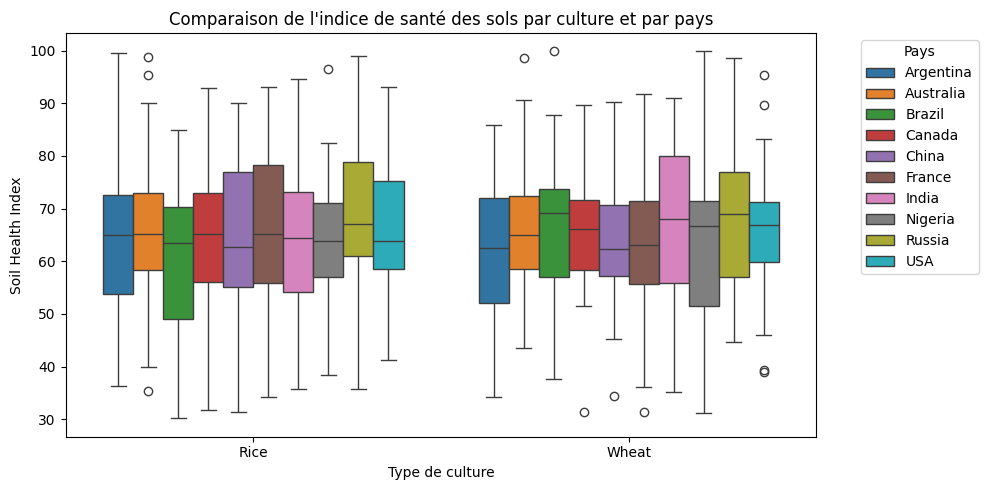

In [60]:
# Question 6: Create the boxplots that compare the soil health index across crops and all the countries

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Boxplot du Soil Health Index selon le type de culture, coloré par pays
sns.boxplot(data=data_climate, x='Crop_Type', y='Soil_Health_Index', hue='Country')

plt.title("Comparaison de l'indice de santé des sols par culture et par pays")
plt.xlabel("Type de culture")
plt.ylabel("Soil Health Index")
plt.legend(title='Pays', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




## Exercise 3: Clustering

SerriFleur aims to classify countries based on their farming practices in order to provide region-specific recommendations. You propose using unsupervised learning to identify distinct fertilizer usage profiles.

Your mission:



*   For each crop type, use agglomerative clustering on fertilizer usage with 4 clusters, euclidian distance metric and ward linkage
*   Analyze whether wheat and rice follow similar cluster pattern
*   Plot the dendrogram representation of fertilizer usage, for each crop type, with euclidian distance metric and average linkage


In [62]:
# Agglomerative Clustering for Wheat
# Question 7: Find the number of values in each clustering label
from sklearn.cluster import AgglomerativeClustering
import numpy as np

wheat_data = data_climate[data_climate['Crop_Type'] == 'Wheat']
X_wheat = wheat_data[['Fertilizer_Use']].values

wheat_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
wheat_labels = wheat_model.fit_predict(X_wheat)

unique, counts = np.unique(wheat_labels, return_counts=True)
print(dict(zip(unique, counts)))




{np.int64(0): np.int64(129), np.int64(1): np.int64(126), np.int64(2): np.int64(34), np.int64(3): np.int64(44)}


In [63]:
# Agglomerative Clustering for Rice
# Question 7: Find the number of values in each clustering label

from sklearn.cluster import AgglomerativeClustering
import numpy as np

rice_data = data_climate[data_climate['Crop_Type'] == 'Rice']
X_rice = rice_data[['Fertilizer_Use']].values

rice_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rice_labels = rice_model.fit_predict(X_rice)

unique, counts = np.unique(rice_labels, return_counts=True)
print(dict(zip(unique, counts)))



{np.int64(0): np.int64(137), np.int64(1): np.int64(50), np.int64(2): np.int64(60), np.int64(3): np.int64(85)}


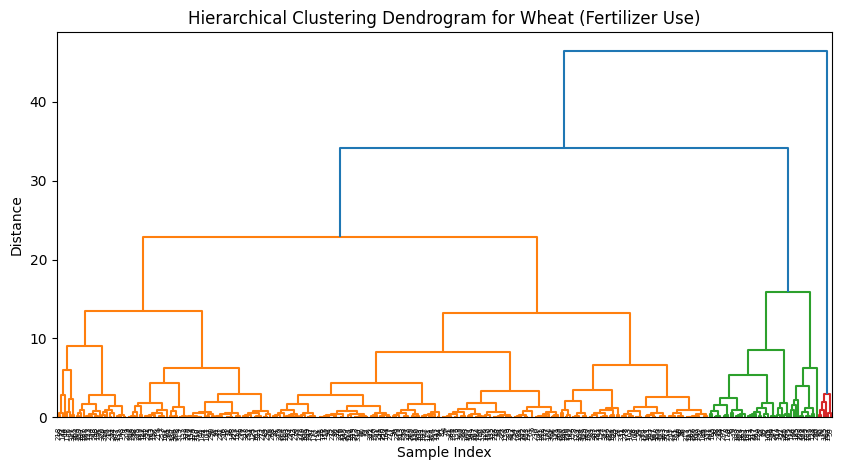

In [64]:
# Question 8: Hierarchical Clustering for Wheat
# Don't forget to reshape the values with numpy

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Filtrer les données pour le blé (Wheat)
wheat_data = data_climate[data_climate['Crop_Type'] == 'Wheat']

# Extraire la variable Fertilizer_Use et reshape en 2D (obligatoire)
X_wheat = wheat_data['Fertilizer_Use'].values.reshape(-1, 1)

# Appliquer le linkage hiérarchique (euclidean + average)
linked = linkage(X_wheat, method='average', metric='euclidean')

# Tracer le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram for Wheat (Fertilizer Use)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


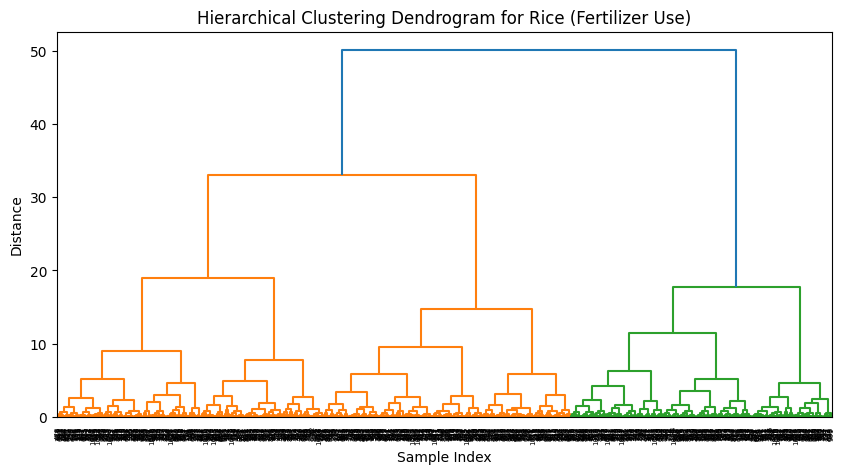

In [ ]:
# Question 8: Hierarchical Clustering for Rice
# Don't forget to reshape the values with numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Filtrer les données pour le riz (Rice)
rice_data = data_climate[data_climate['Crop_Type'] == 'Rice']

# Extraire la variable Fertilizer_Use et reshape en 2D
X_rice = rice_data['Fertilizer_Use'].values.reshape(-1, 1)

# Appliquer le linkage hiérarchique (euclidean + average)
linked = linkage(X_rice, method='average', metric='euclidean')

# Tracer le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram for Rice (Fertilizer Use)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


## Exercise 4: Simple Linear Regression

A policymaker asks a simple question: "Does CO₂ have a measurable impact on crop yield for wheat and rice ?"
You decide to test this using a basic regression model.

Your mission:

*   Plot the heatmap of correlations for numeric columns only.
*   Model Crop_Yield as a function of CO2_Emissions (with `test_size = 0.3`, `random_state = 123` and `shuffle=True`).
*   Use MinMaxScaler and find the $R^2$, the MSE and the MAE.






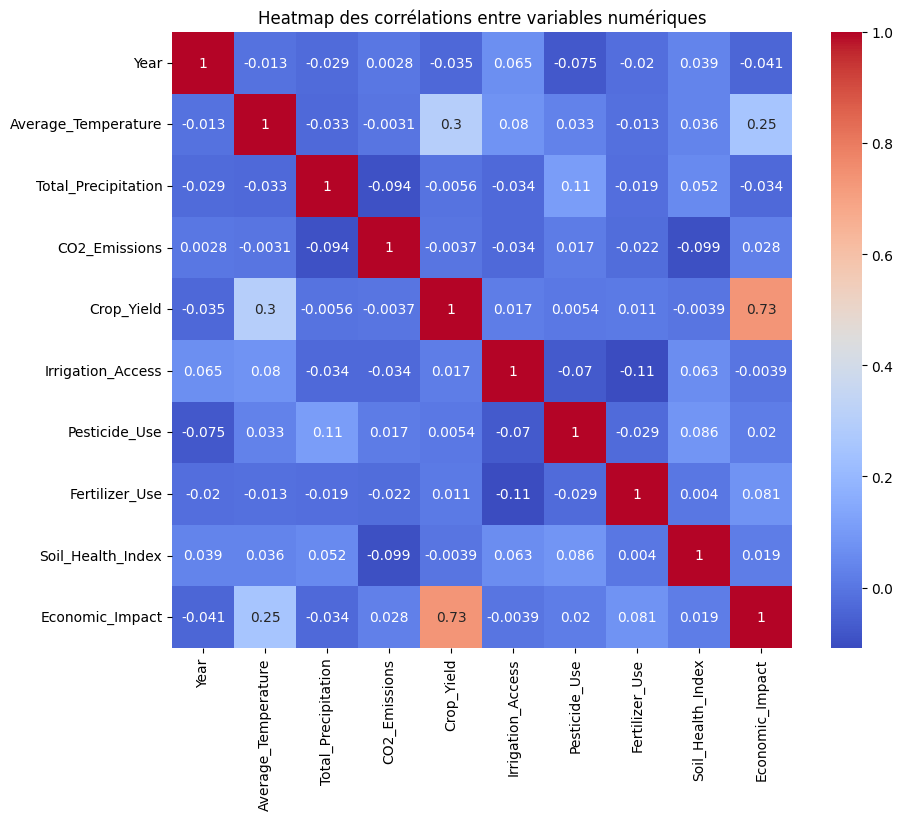

In [66]:
# Question 9: Plot heatmap of correlations

import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_data = data_climate.select_dtypes(include='number')

# Tracer la heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap des corrélations entre variables numériques")
plt.show()


In [67]:
# Seperate features and labels

# Séparer les variables explicatives (features) et la variable cible (label)
X = data_climate[['CO2_Emissions']]
y = data_climate['Crop_Yield']


In [69]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, shuffle=True
)


In [70]:
# Scale the data

from sklearn.preprocessing import MinMaxScaler

# Initialiser le scaler
scaler = MinMaxScaler()

# Ajuster le scaler sur les données d'entraînement et transformer les données
X_train_scaled = scaler.fit_transform(X_train)

# Utiliser le même scaler pour transformer les données de test
X_test_scaled = scaler.transform(X_test)


In [71]:
# Create linear regression model and fit into the training data

from sklearn.linear_model import LinearRegression

# Créer le modèle
model = LinearRegression()

# L’entraîner sur les données d'entraînement mises à l’échelle
model.fit(X_train_scaled, y_train)


LinearRegression()

In [72]:
# Question 10: Print out the R2, MSE and MAE score

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Prédictions sur les données de test
y_pred = model.predict(X_test_scaled)

# Évaluer les performances du modèle
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


R² Score: -0.0084
Mean Squared Error (MSE): 0.4784
Mean Absolute Error (MAE): 0.5525


## Exercise 5: Multivariate Regression with Categorical Variables

Real-life relationships are rarely one-dimensional. You now create a new model to include all the other variables of the dataset, some of which are key climate factors.

Your mission:


*   Transform the column `Crop_Type` using `LabelEncoder`function and the column `Country` using `One-Hot` encoding
*   Build a multivariate regression model using all the variables to predict crop yield  (with `test_size = 0.3`, `random_state = 123` and `shuffle=True`)
*   Compare its performance with the previous model of part 4



In [75]:
# Seperate features and labels, and transform the columns Crop_Type and Country (don't forget to delete the old columns)

from sklearn.preprocessing import LabelEncoder

df = data_climate.copy()
y = df['Crop_Yield']

label_encoder = LabelEncoder()
df['Crop_Type_Encoded'] = label_encoder.fit_transform(df['Crop_Type'])

df = pd.get_dummies(df, columns=['Country'], prefix='Country')

# Supprimer les anciennes colonnes inutiles
df = df.drop(columns=['Crop_Yield', 'Crop_Type', 'Region'])

X = df



In [81]:
# Split data into train and test sets, create linear regression model and fit into the training data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, shuffle=True
)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_multi_reg = LinearRegression()
model_multi_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [87]:
# Question 11: Print out the R2, MSE and MAE score

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_prediction_multi = model_multi_reg.predict(X_test_scaled)

r2_multi = r2_score(y_test, y_prediction_multi)
mse_multi = mean_squared_error(y_test, y_prediction_multi)
mae_multi = mean_absolute_error(y_test, y_prediction_multi)

print(f"Multivariate Regression - R² Score= {r2_multi:.4f} - Mean Squared Error (MSE)= {mse_multi:.4f} - Mean Absolute Error (MAE): {mae_multi:.4f}")


Multivariate Regression - R² Score= 0.5326 - Mean Squared Error (MSE)= 0.4777 - Mean Absolute Error (MAE): 0.5488


# Part 2: Association Rules - Turn movies ratings into bussiness insights!

Lights, Camera, Data!

Are you a movie fan? I bet you are! Have you ever wondered how streaming platforms like Netflix seem to know exactly which movie you'll love next? You might have heard that they use recommendation algorithms and wondered how they work.

In this assignment, you'll explore how **association rules** can be used to develop a simple recommendation algorithm. The idea is simple: by analyzing which movies are frequently watched together, we can uncover patterns and use these insights to suggest movies based on a user's viewing history.

Now, let's dive in and make it happen!

## Exercise 1: Data Processing

We will use a subset of MoviesLens dataset, which consists of user ratings for a list of movies and information about the movies themselves (i.e., title and genres).

First, you need to load the ratings data from the URL below, and try to print out the size of the dataset, the number of users who provided ratings, and the number of movies that have been rated.

URL = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"

The `ratings` dataset contains four columns:

- `userID`: The ID of the user.
- `movieID`: The ID of the movie being rated.
- `rating`: The rating given by the user for the corresponding movie.
- `timestamp`: The timestamp when the rating was recorded.

In [91]:
import pandas as pd

url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"
df_ratings = pd.read_csv(url)


In [110]:
# Print the first 5 rows of the dataframe

df_ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [111]:
# Print the shape of the dataframe

df_ratings.shape


(100836, 4)

In [112]:
# Print the number of ratings available

print("Nombre total de notes :", len(df_ratings))


Nombre total de notes : 100836


In [113]:
# Print the number of users who provided ratings

print("Nombre d'utilisateurs :", df_ratings['userId'].nunique())


Nombre d'utilisateurs : 610


In [114]:
# Print the number of movies have been rated

print("Nombre de films notés :", df_ratings['movieId'].nunique())


Nombre de films notés : 9724


[texte du lien](https://)Now, we need to transform the dataset into a matrix of size `n_users` × `n_movies`, where each row represents a user's ratings for all movies. If a user has not rated a movie, the rating will be 0.

To create this matrix, we will use the `pivot` function from pandas.

In [99]:
df_ratings_pivot = df_ratings.pivot(index='userId', columns='movieId', values='rating')
df_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You can see that there are a lot of NaN values because each user rates only a subset of movies (those they have watched). We need to fill these NaN values with 0s.

In [100]:
# Replace NaN values with 0
df_ratings_pivot.fillna(0, inplace=True)
df_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, we don’t just want to identify movies that are frequently watched together—we want to focus on the ones that people actually enjoy. To do this, we'll consider a rating of 3 or higher as an indicator that a viewer liked the movie.

Therefore, we need to map ratings ≥ 3 to `True` (liked) and ratings below 3 to `False` (not liked).

In [101]:
df_ratings_pivot = df_ratings_pivot.map(lambda x: True if x >= 3 else False)
df_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now, we are ready to apply the association rules!!

## Exercise 2: Association Rules



We will apply the **Apriori algorithm** to identify interesting association rules.

First, we need to find the frequent itemsets using the following configurations:

`min_support = 0.1`
`max_len = 2`

In [102]:
# Find the frequent itemsets

from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_ratings_pivot, min_support=0.1, use_colnames=True, max_len=2)
frequent_itemsets.head()


,support,itemsets
0,0.326230,(1)
1,0.145902,(2)
2,0.162295,(6)
3,0.193443,(10)
4,0.122951,(16)


In [115]:
# Question 12: Find the number of itemsets

print("Nombre d'itemsets fréquents =", len(frequent_itemsets))


Nombre d'itemsets fréquents = 2929


Now, we will mine the association rules from the frequent itemsets found above using `metric='lift'` and `min_threshold=1`.

In [122]:
# Find association rules

from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(32),(1),0.280328,0.326230,0.150820,0.538012,1.649182,1.0,0.059368,1.458415,0.546969,0.330935,0.314324,0.500162
1,(1),(32),0.326230,0.280328,0.150820,0.462312,1.649182,1.0,0.059368,1.338456,0.584233,0.330935,0.252870,0.500162
2,(1),(34),0.326230,0.170492,0.111475,0.341709,2.004252,1.0,0.055856,1.260093,0.743667,0.289362,0.206408,0.497777
3,(34),(1),0.170492,0.326230,0.111475,0.653846,2.004252,1.0,0.055856,1.946448,0.604046,0.289362,0.486244,0.497777
4,(1),(47),0.326230,0.313115,0.132787,0.407035,1.299955,1.0,0.030640,1.158391,0.342465,0.262136,0.136734,0.415559


Now, let's map the movie IDs with their titles so we can identify them.

First, let's load the `movies` dataset from this URL: "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"

You will see that the `movies` dataset has 3 columns:
- `movieID`: The ID of the movie.
- `title`: The title of the movie.
- `genres`: The genres of the movie.

In [105]:
df_movies = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In the following cell, we provide the code to map movie IDs with their titles. We assume that you are using the variable `rules` to store the association rules. If you used a different variable name, please update the code accordingly.

In [117]:
def get_movie_name(movie_id):
    return df_movies[df_movies['movieId'] == movie_id]['title'].values[0]

In [123]:
# Map antecedents and consequents with movie names
rules['antecedents'] = rules['antecedents'].apply(lambda x: get_movie_name(list(x)[0]))
rules['consequents'] = rules['consequents'].apply(lambda x: get_movie_name(list(x)[0]))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Toy Story (1995),0.280328,0.326230,0.150820,0.538012,1.649182,1.0,0.059368,1.458415,0.546969,0.330935,0.314324,0.500162
1,Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.326230,0.280328,0.150820,0.462312,1.649182,1.0,0.059368,1.338456,0.584233,0.330935,0.252870,0.500162
2,Toy Story (1995),Babe (1995),0.326230,0.170492,0.111475,0.341709,2.004252,1.0,0.055856,1.260093,0.743667,0.289362,0.206408,0.497777
3,Babe (1995),Toy Story (1995),0.170492,0.326230,0.111475,0.653846,2.004252,1.0,0.055856,1.946448,0.604046,0.289362,0.486244,0.497777
4,Toy Story (1995),Seven (a.k.a. Se7en) (1995),0.326230,0.313115,0.132787,0.407035,1.299955,1.0,0.030640,1.158391,0.342465,0.262136,0.136734,0.415559


Now, we are ready to find out the most interesting association rules (i.e a pair of movies that are watched together) in term of the `lift` metric

In [124]:
# Question 13: Find the most interesting rule

most_interesting_rule = rules.sort_values('lift', ascending=False).iloc[0]
print("Règle la plus intéressante :")
print(most_interesting_rule)


Règle la plus intéressante :
antecedents           Harry Potter and the Prisoner of Azkaban (2004)
consequents            Harry Potter and the Chamber of Secrets (2002)
antecedent support                                           0.142623
consequent support                                           0.142623
support                                                      0.106557
confidence                                                   0.747126
lift                                                         5.238473
representativity                                                  1.0
leverage                                                     0.086216
conviction                                                   3.390537
zhangs_metric                                                0.943698
jaccard                                                       0.59633
certainty                                                    0.705061
kulczynski                                                   

In [125]:
# Question 14: Find the movie that is the most frequently watched together with "Beauty and the beast (1991)"

beauty_rules = rules[rules['antecedents'] == 'Beauty and the Beast (1991)']
most_associated = beauty_rules.sort_values('lift', ascending=False).iloc[0]
print("Film le plus associé à 'Beauty and the Beast (1991)' :", most_associated['consequents'])


Film le plus associé à 'Beauty and the Beast (1991)' : Aladdin (1992)


# Part 3: Binary Classification

You are working at a leading Tour & Travel Company, and there’s trouble on the horizon — some customers are slipping away, never to book again! Your job is to predict which customers are at risk of churning and help the company keep them engaged.

Using historical customer data, you’ll use binary classification algorithms to identify potential churners before they disappear.

First, you need to load the dataset from this URL: "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv"

The dataset consists of following columns:
- `Age`: Age of customer.
- `FrequentFlyer`: Whether the customer takes frequent flights.
- `AnnualIncomeClass`: Class of the customer's annual income.
- `ServicesOpted`: Number of times services opted during recent years.
- `AccountSyncedToSocialMedia`: Whether company account of the user is synchronised to their social media.
- `BookedHotelOrNot`: Whether the customer books hotels using company services.
- `Target`: Whether the customer is a churner (1 for yes, 0 for no).

Try to print out the number of samples available in the dataset and types of each columns.

In [126]:
import pandas as pd

url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv"
df_travel = pd.read_csv(url)


In [127]:
# Print the first 5 rows

df_travel.head()


,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,36,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [128]:
# Print the number of samples in the dataset

# Afficher le nombre d'échantillons (lignes) et de colonnes
df_travel.shape


(960, 7)

In [129]:
# Print the column types

# Afficher les types de colonnes
df_travel.dtypes


,0
Age,int64
FrequentFlyer,object
AnnualIncomeClass,object
ServicesOpted,int64
AccountSyncedToSocialMedia,object
BookedHotelOrNot,object
Target,int64


## Exercise 1: Preprocess


First, we want to convert the columns with an object data type to
a **categorical** one and visualize the correlation heatmap of the dataset's features.

In [130]:
for col in df_travel.select_dtypes(include=['object']).columns:
    df_travel[col] = pd.Categorical(df_travel[col]).codes

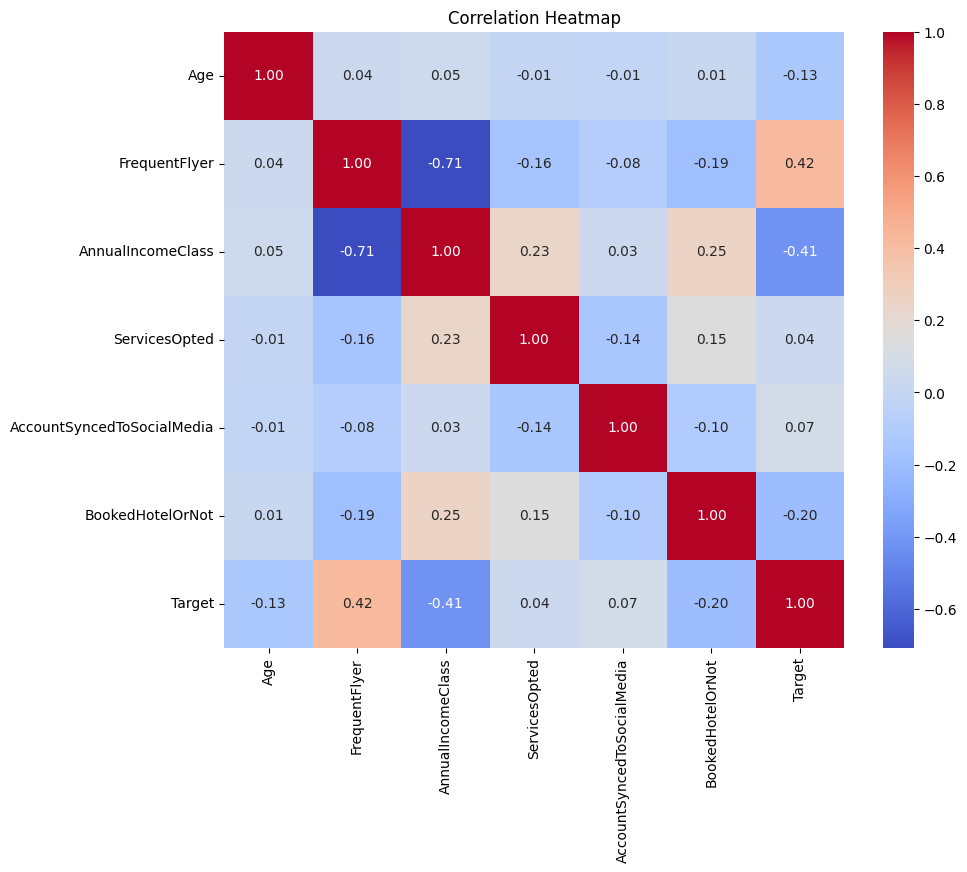

In [131]:
# Question 15: Plot heatmap of correlations

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_travel.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Now, let's separate the dataset into features (X) and labels (y). Then, split the data into train and test sets using `train_test_split` function from Sklearn with `test_size=0.2`, `random_state=42`, and set `stratify=y` to preserve the label distribution in both sets.

In [132]:
# Seperate the dataset into features and labels

X = df_travel.drop("Target", axis=1)
y = df_travel["Target"]


In [133]:
# Split into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Before building any model, it's useful to establish a simple reference point. Imagine predicting the most frequent class for every single observation—no learning, just repetition. The accuracy you'd get from that naive approach is called the baseline accuracy. It’s the minimum benchmark any meaningful model should aim to outperform.

In [134]:
# Question 16: Calculate baseline accuracy

# Fréquence de la classe majoritaire dans les données d'entraînement
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(f"Baseline accuracy= {baseline_accuracy:.2f}")


Baseline accuracy= 0.77


Now, let's standardize the features using `StandardScaler` from Sklearn.

In [137]:
# Standardise features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Exercise 2: Logistic regression

First, try use logistic regression for use our data. Use LogisticRegression with the following setting:
`penalty='l2', solver='lbfgs', max_iter=1000, random_state=30`

In [136]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=30)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=30)

In [21]:
# Question 17: Find the test accuracy

from sklearn.metrics import accuracy_score

# Prédictions et précision
y_prediction = log_reg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_prediction)
print(f"Test Accuracy= {test_accuracy:.2f}")


Test Accuracy= 0.85


Next, train a logistic regression classifier with cross-validation. Use 5 folds and 9 values in the logscale between $10^{-4}$ and $10^4$ for the regularizer parameter. For the rest of the arguments, we use the same values as we used for the logistic regression with no cross validation.

__Important:__ Set the following values for the arguments:
`
penalty='l2', solver='lbfgs', max_iter=1000, random_state=42, cv=4, Cs=*9*
`

In [24]:
# Train a logistic regression classifier with cross-validation

from sklearn.linear_model import LogisticRegressionCV
import numpy as np

# Générer 9 valeurs entre 1e-4 et 1e4 de manière logarithmique
Cs = np.logspace(-4, 4, 9)

# Modèle avec validation croisée
log_reg_cv = LogisticRegressionCV(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42,
    cv=4,
    Cs=Cs
)
log_reg_cv.fit(X_train_scaled, y_train)


LogisticRegressionCV(Cs=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                     cv=4, max_iter=1000, random_state=42)

In [28]:
# Question 18: Find the value of the regularization parameter and the test accuracy

# Meilleure valeur de C
RegularizationParameter = log_reg_cv.C_[0]
print(f"Regularization parameter C: {RegularizationParameter}")

# Prédictions et précision
y_pred_cv = log_reg_cv.predict(X_test_scaled)
cv_test_accuracy = accuracy_score(y_test, y_pred_cv)
print(f"Test Accuracy with CrossValidation= {cv_test_accuracy:.2f}")


Regularization parameter C: 1.0
Test Accuracy with CrossValidation= 0.85


## Exercise 3: KNN classifier

Use the KNeighborClassifier from sklearn using the following setting:
`n_neighbors=7, p=2, weights='uniform', algorithm="kd_tree"`

In [29]:
# KNeighborClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform', algorithm="kd_tree")
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7)

Use `GridSearchCV` to find the best hyper-parameters for your KNN model. Use values between 1 and 10 for `n_neighbors` argument and use either 'uniform' or 'distance' for the `weights` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"n_neighbors": range(1, 11), "weights":["uniform", "distance"]}, cv=5
```

In [37]:
# Question 19: Find the accuracy of the best KNN model

from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres
param_grid = {
    "n_neighbors": range(1, 11),
    "weights": ["uniform", "distance"]
}

# Initialiser le classifieur KNN
knn = KNeighborsClassifier(p=2, algorithm="kd_tree")

# GridSearchCV avec 5 folds
GSCV = GridSearchCV(knn, param_grid, cv=5)
GSCV.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score

# Prédictions et précision
y_prediction_knn = GSCV.best_estimator_.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_prediction_knn)
print(f"Test accuracy of the best KNN model: {knn_accuracy:.2f}")


Test accuracy of the best KNN model: 0.87


In [45]:
# Question 20: Find the 'n_neighbors' and 'weights' values for the best KNN model

best_KNNparams = GSCV.best_params_
print(f"Best 'n_neighbors'= {best_KNNparams['n_neighbors']}")
print(f"Best 'weights'= {best_KNNparams['weights']}")


Best 'n_neighbors'= 3
Best 'weights'= distance


## Exercise 4: Decision Tree

Train a Decision Tree classifier on the training data. Use the following values for the arguments of the decision tree:
```
criterion="gini", max_depth=3, random_state=30
```

In [38]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Modèle de base
dtc = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=30)
dtc.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=3, random_state=30)

Use `GridSearchCV` to find the best hyper-parameters for your decision tree model. Use values between 1 and 7 for `max_depth` argument and use either 'gini' or 'entropy' for the `criterion` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"max_depth": range(1, 8), "criterion":["gini", "entropy"]}, cv=5
```

In [41]:
# Question 21: Find the accuracy of the best decision tree model

from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": range(1, 8),
    "criterion": ["gini", "entropy"]
}

# GridSearch
GSDTC = GridSearchCV(DecisionTreeClassifier(random_state=30), param_grid, cv=5)
GSDTC.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score

y_pred_dt = GSDTC.best_estimator_.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Best Decision Tree Accuracy= {dt_accuracy:.2f}")



Best Decision Tree Accuracy= 0.90


In [43]:
# Question 22: Find the 'criterion' and 'max_depth' values for the best decision tree model

best_params_dt = GSDTC.best_params_
print(f"Best criterion= {best_params_dt['criterion']}")
print(f"Best max_depth= {best_params_dt['max_depth']}")


Best criterion= gini
Best max_depth= 6


The company places a strong emphasis on keeping its customers and has solid resources dedicated to retention. In such a case, choosing the right evaluation metric becomes crucial. The answer lies in understanding what matters most in this context.


Question 23: Find the best metric for the company

> TODO: The best metric for the company is the F1-score, as it balances precision and recall.


In [36]:
# Question 24: Find the model that gives the best result using the metric above

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_dt)
print(f"Best Decision Tree F1-score: {f1:.2f}")


Best Decision Tree F1-score: 0.74
